# The HFM library - A fast marching solver with adaptive stencils

## Part : Isotropic and anisotropic metrics
## Chapter : Asymmetric Rander metrics

In this notebook, we present a highly tunable class of metrics, strongly asymmetric and anisotropic, referred to as *asymmetric Rander* metrics. They generalize both Rander metrics and asymmetric quadratic metrics, and take the following form
$$
    F_x(\dot x) := \sqrt{ \|\dot x\|^2_{M(x)} + \max\{0,<u(x), \dot x>\}^2+\max\{0,<v(x), \dot x>\}^2}+<w(x), \dot x>,
$$
where $M$ is a field of positive definite matrices, and $u,v,w$ are vector fields, with $w$ small enough.

## 0. Importing the required libraries

In [1]:
import sys; sys.path.insert(0,"../..") # Allow import of agd from parent directory (useless if conda package installed)
#from Miscellaneous import TocTools; print(TocTools.displayTOC('AsymmetricQuadratic','FMM'))

In [2]:
from agd import Eikonal
from agd.Metrics import AsymQuad,Rander 
from agd.Metrics.asym_rander import AsymRander
from agd.Plotting import savefig; #savefig.dirName = 'Figures/AsymmetricQuadratic'
from agd import FiniteDifferences as fd
from agd import AutomaticDifferentiation as ad
norm_infinity = ad.Optimization.norm_infinity

In [3]:
import numpy as np; xp = np
import matplotlib.pyplot as plt

In [4]:
def ReloadPackages():
    from Miscellaneous.rreload import rreload
    global Eikonal,AsymRander
    Eikonal,AsymRander = rreload([Eikonal,AsymRander],rootdir='../..')

### 0.1 Additional configuration

Fast marching with *Asymmetric Rander* metrics, unfortunately, is only available in two dimensions, and requires the compiled HFM library available as a conda package. In particular, this notebook cannot be run with GoogleColab.

In [5]:
#raise ad.DeliberateNotebookError("Asymmetric Rander metrics are not GPU implemented")

## 1. Case of a constant metric

In [83]:
ReloadPackages()

In [84]:
hfmIn = Eikonal.dictIn({
    'model':'AsymRander2',
    'seed':(0,0),
    'exportValues':1,
    'factoringRadius':100,
#    'factoringRadius':200,
})
hfmIn.SetRect([[-1,1],[-1,1]],dimx=21)
X = hfmIn.Grid()

A corner adapted metric.

In [85]:
metric = AsymRander(np.eye(2),[0.,0.],[0.,0.],[0.5,0.])
hfmIn['metric']=metric

In [86]:
#plt.axis('equal')
#plt.contourf(*X,hfmIn['factoringValues']);

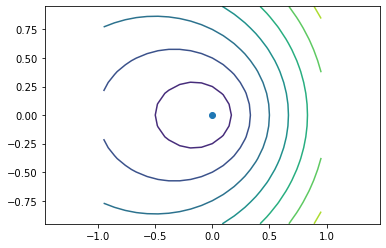

In [87]:
plt.axis('equal')
plt.contour(*X,metric.norm(X))
plt.scatter(0,0);

In [88]:
#hfmIn['factoringValues'] = metric.norm(X)
#hfmIn['factoringGradients'] = np.moveaxis(metric.gradient(X),0,-1)

In [89]:
factGrid = hfmIn.SetFactor(radius=5)

In [90]:
hfmIn['factoringValues'][5,5]=0

In [91]:
#hfmIn['factoringGradients']

In [92]:
hfmOut = hfmIn.Run()

Field verbosity defaults to 1
Field cosAngleMin defaults to 0.5
Field order defaults to 1
Field seedRadius defaults to 2
Fast marching solver completed in 0.010566 s.
***** Warning ! *****
Unused fields from user: factoringRadius 
********************


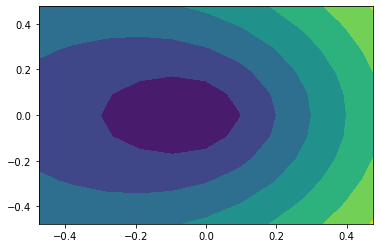

In [93]:
plt.contourf(*factGrid,hfmIn['factoringValues'])

In [94]:
np.any(np.isnan(hfmOut['values']))

False

In [95]:
np.any(np.isnan(metric.norm(X)))

False

In [96]:
hfmIn['factoringIndexShift']

array([5., 5.])

In [97]:
norm_infinity(hfmOut['values'] - metric.norm(X))

0.006453107791602353

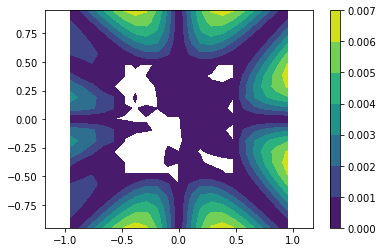

In [98]:
plt.contourf(*X,hfmOut['values'] - metric.norm(X));
plt.axis('equal');
plt.colorbar()

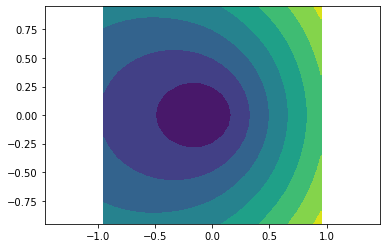

In [99]:
plt.contourf(*X,hfmOut['values']);
plt.axis('equal');

In [55]:
hfmIn

dictIn({'arrayOrdering': 'RowMajor', 'model': 'AsymRander2', 'seeds': array([[0., 0.]]), 'exportValues': 1, 'factoringRadius': 100, 'gridScale': array(0.0952381), 'dims': array([21., 21.]), 'origin': array([-1., -1.]), 'metric': AsymRander(array([[1., 0.],
       [0., 1.]]), array([0., 0.]), array([0., 0.]), array([0.5, 0. ])), 'factoringValues': array([[8.70679583e-01, 8.05107052e-01, 7.43452236e-01, 6.86338630e-01,
        6.34467028e-01, 5.88603799e-01, 5.49555201e-01, 5.18124429e-01,
        4.95051336e-01, 4.80940535e-01, 4.76190476e-01, 4.80940535e-01,
        4.95051336e-01, 5.18124429e-01, 5.49555201e-01, 5.88603799e-01,
        6.34467028e-01, 6.86338630e-01, 7.43452236e-01, 8.05107052e-01,
        8.70679583e-01],
       [8.52726100e-01, 7.83611625e-01, 7.18247103e-01, 6.57309929e-01,
        6.01586079e-01, 5.51964775e-01, 5.09415029e-01, 4.74936474e-01,
        4.49480425e-01, 4.33846204e-01, 4.28571429e-01, 4.33846204e-01,
        4.49480425e-01, 4.74936474e-01, 5.09415029

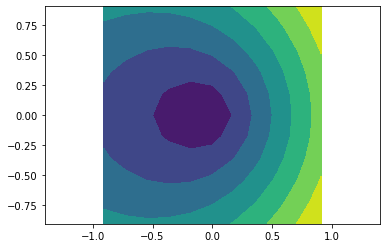

In [92]:
plt.contourf(*X,hfmOut['values'])
plt.axis('equal');

In [62]:
hfmOut['values'] / metric.norm(X)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [55]:
help(hfmIn.Run)

Help on method Run in module agd.Eikonal.DictIn:

Run(join=None, **kwargs) method of agd.Eikonal.DictIn.dictIn instance
    Calls the HFM library, prints log and returns output.
    Inputs : 
    - join (optional) : join the dictionary with these additional entries before running.
    - **kwargs (optional) : passed to the run_detail.RunSmart or HFM_CUDA.RunGPU methods.
    
    See dictIn().RunHelp() for additional details, depending on the running mode.



In [28]:
hfmIn.RunHelp()

Help on function RunSmart in module agd.Eikonal.run_detail:

RunSmart(hfmIn, co_output=None, cache=None, returns='out')
    Calls the HFM library, a CPU eikonal solver written in C++,
    with pre-processing and post-processing of data.
    
    Main input : 
    - hfmIn, a dictionary like structure, containing the eikonal solver data.
    
    The C++ library embeds some help information, which can be accessed using the 
    following key:value pairs in hfmIn.
    * 'verbosity' : set to 1 or 2 to display information on run, including the defaulted keys.
     set to 0 to silence the run.
    * 'keyHelp' : set as a string of keys separated by spaces, to print help on these.
     example 'keyHelp':"seeds tips"
    
    Optional input:
    - co_output (optional) : used for reverse automatic differentiation.
    - cache (optional) : store some intermediate results to bypass computations at a later stage. 
    - returns (optional) : early aborts the run (debug purposes). ('in_raw','out_raw'